In [182]:

%load_ext autoreload
%autoreload 2
import pandas as pd
from cv2x_data_handler import cv2xDataHandler as dh
from cv2x_plotter import *
from numpy import inf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Throughput and Packet Loss

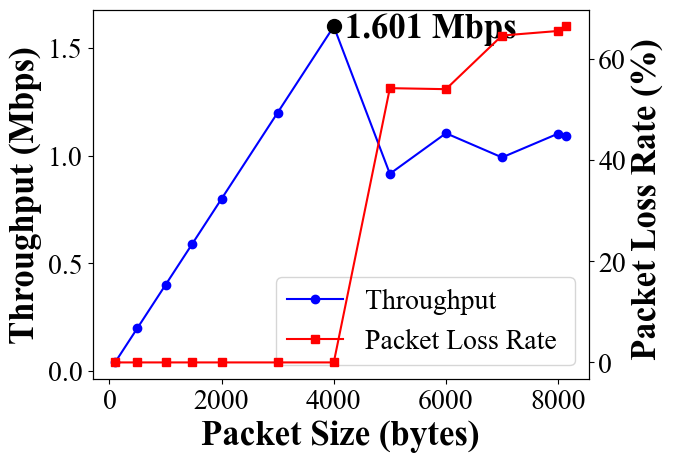

In [ ]:
# Indoor
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  showPeak=True,
                                  title ='Rx'+whichRx)
            
        

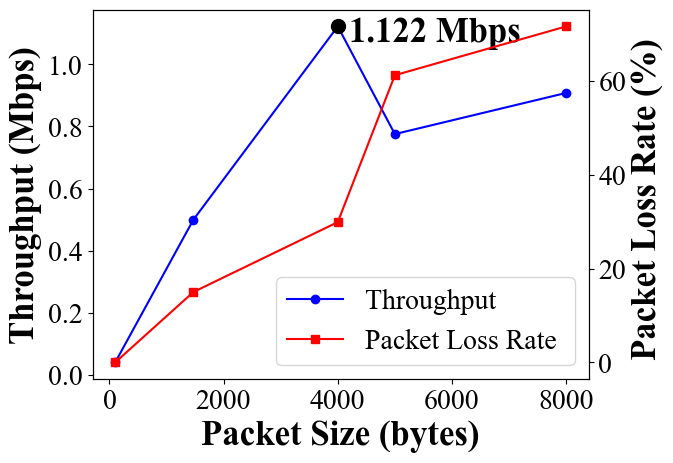

In [ ]:
# Outdoor
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  showPeak=True,
                                  title = 'Rx'+whichRx)

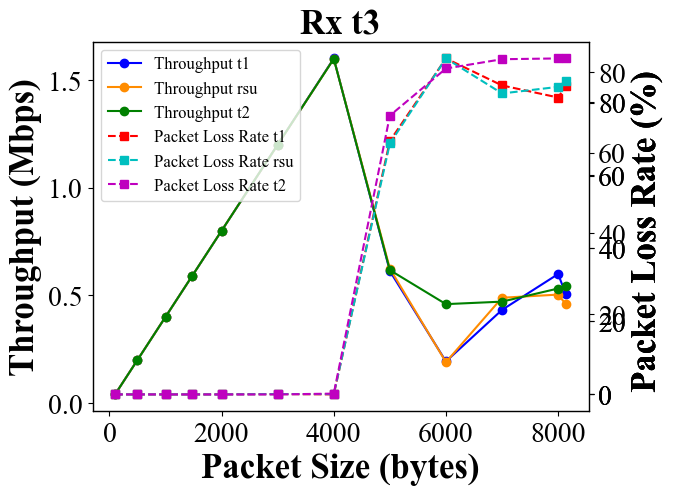

In [ ]:
# 3TX
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_throughput ={}
    y_loss = {}
    for whichTx, logs in v.items(): 
        y_throughput[whichTx] = {}
        y_loss[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            pck=dh.getPacketSizeFromRxLog(t)
            tThroughput = dh.calculateAvgThroughput(t)
            tLoss= dh.calculateAvgLoss(t)
            y_throughput[whichTx][pck] = tThroughput
            y_loss[whichTx][pck] = tLoss
        y_throughput[whichTx] = dict(sorted(y_throughput[whichTx].items()))
        y_loss[whichTx] = dict(sorted(y_loss[whichTx].items()))   
    drawLineChart4ThroughputNLoss(y_throughput, 
                                  y_loss,
                                  title ='Rx '+whichRx)
            
        

# Latency and Jitter

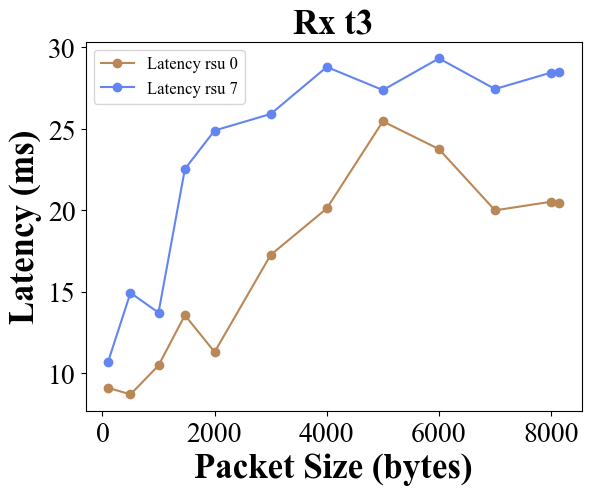

In [ ]:
# Latency Indoor
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
checked_priority = [0,7]
final_dict ={}
for prio in checked_priority:
    data = dh.getRxTracesByConfiguration(dataset_path,
                                        prio=prio,resv=20,ipg=20)
    for whichRx, v in data.items():
        y_latency = {}
        for whichTx, logs in v.items(): 
            y_latency[whichTx] = {}
            for log in logs:
                t = pd.read_csv(log)
                pck=dh.getPacketSizeFromRxLog(t)
                tLatency = dh.calculateAvgLatency(t)
                y_latency[whichTx][pck] = tLatency
            y_latency[whichTx] = dict(sorted(y_latency[whichTx].items())) 
        if(whichRx not in final_dict):
            final_dict[whichRx] = {}
        final_dict[whichRx][prio] = y_latency
        
for whichRx, v in final_dict.items():
     drawLineChart4Latency(v, title = 'Rx '+ whichRx)

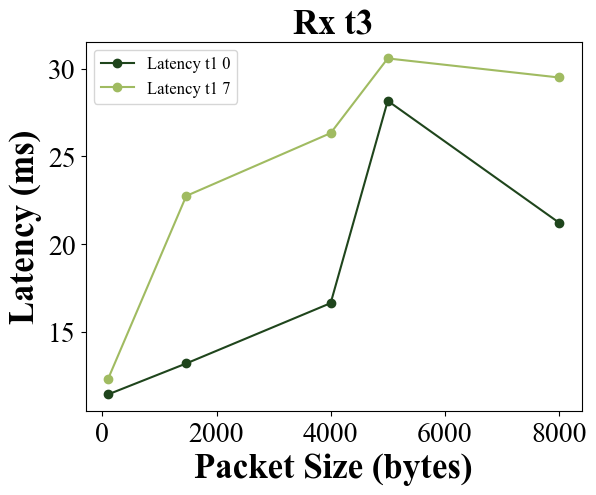

In [ ]:
# Latency Indoor
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
checked_priority = [0,7]
final_dict ={}
for prio in checked_priority:
    data = dh.getRxTracesByConfiguration(dataset_path,
                                        prio=prio,resv=20,ipg=20)
    for whichRx, v in data.items():
        y_latency = {}
        for whichTx, logs in v.items(): 
            y_latency[whichTx] = {}
            for log in logs:
                t = pd.read_csv(log)
                pck=dh.getPacketSizeFromRxLog(t)
                tLatency = dh.calculateAvgLatency(t)
                y_latency[whichTx][pck] = tLatency
            y_latency[whichTx] = dict(sorted(y_latency[whichTx].items())) 
        if(whichRx not in final_dict):
            final_dict[whichRx] = {}
        final_dict[whichRx][prio] = y_latency
        
for whichRx, v in final_dict.items():
     drawLineChart4Latency(v, title = 'Rx '+ whichRx)

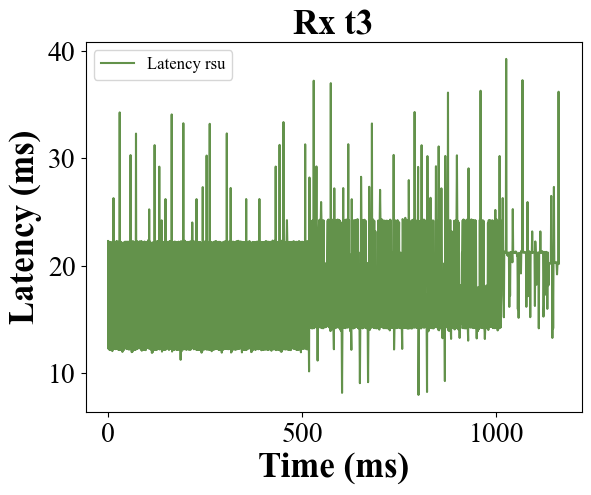

In [ ]:
# jitter - misalignment
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=50)
for whichRx, v in data.items():
    y_latency = {}
    for whichTx, logs in v.items(): 
        y_latency[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            t = dh.getRxLatencyMetrics(t)
            for k,v in t.iterrows():
                y_latency[whichTx][k] = v['latency (ms)']
    drawLatencyByTime(y_latency, title = 'Rx '+whichRx)

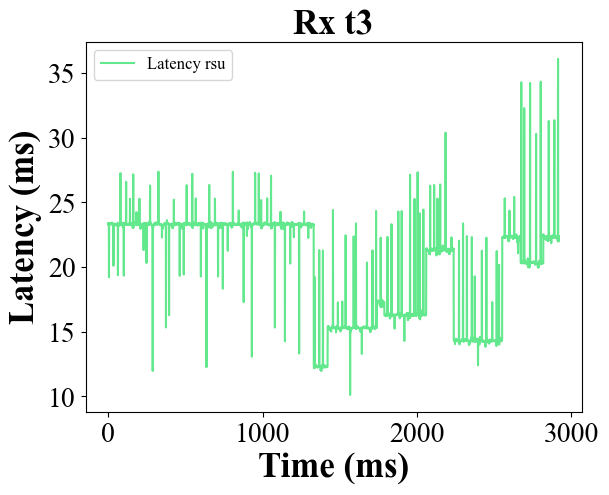

In [ ]:
# jitter - alignment
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
data = dh.getRxTracesByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=20)
for whichRx, v in data.items():
    y_latency = {}
    for whichTx, logs in v.items(): 
        y_latency[whichTx] = {}
        for log in logs:
            t = pd.read_csv(log)
            t = dh.getRxLatencyMetrics(t)
            for k,v in t.iterrows():
                y_latency[whichTx][k] = v['latency (ms)']
    drawLatencyByTime(y_latency, title = 'Rx '+whichRx)

# Resource Occupancy 

In [ ]:
# Misalignment RBs
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
files = dh.getSCIByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=50)
for f in files:
    rbs = dh.createRBListByMCS(f)
    drawChannelOccupy(rbs, x_range=200)

Loading BokehJS ...

In [ ]:
# Alignment RBs
dataset_path = '../seev2x_dataset_final/indoor_allcombos/1_tx'
files = dh.getSCIByConfiguration(dataset_path,
                                     pck_len=4000,
                                     prio=0,resv=20,ipg=20)
for f in files:
    rbs = dh.createRBListByMCS(f)
    drawChannelOccupy(rbs, x_range=200)

Loading BokehJS ...